# Philanthropy Data Analysis

•	What is the correlation between donor source of wealth and amount of money given over the course of recent years? 

In [142]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import seaborn as sns
from textwrap import wrap
import random
from scipy.stats import sem

import warnings
warnings.filterwarnings('ignore')

In [97]:
# # Read in the donation data
data_2015 = pd.read_csv("chronicle_data2015.csv", encoding = "ISO-8859-1")
data_2016 = pd.read_csv("chronicle_data2016.csv", encoding = "ISO-8859-1")
data_2017 = pd.read_csv("chronicle_data2017.csv", encoding = "ISO-8859-1")
data_2018 = pd.read_csv("chronicle_data2018.csv", encoding = "ISO-8859-1")
wealth_cat = pd.read_csv("All_wealth_subcategory.csv", encoding = "utf-8")
data_2016.head(2)

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value
0,2016,Philip H. and Penelope Knight,Oregon,Manufacturing,U. of Oregon (Eugene),Oregon,Colleges and universities,Pledge,"$500,000,000"
1,2016,Nicolas Berggruen Charitable Trust (Nicolas Be...,California,Investments,Berggruen Institute (Los Angeles),California,Public affairs,NaN,"$500,000,000"


In [98]:
# Combine the data into a single dataset 
combo = [data_2015, data_2016, data_2017, data_2018]
all_df = pd.concat(combo)
all_df.head(2)

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value
0,2015,John Santikos,Texas,Real estate,San Antonio Area Foundation,Texas,Community foundations,Bequest,"$605,000,000"
1,2015,John A. Paulson,New York,Finance,"Harvard U. (Cambridge, Mass.)",Massachusetts,Colleges and universities,Unrestricted,"$400,000,000"


In [150]:
# Finding the unique names for the donors source of wealth
#all_df["Donor's Source of Wealth"].unique()

In [151]:
# Review field formats in the combined table prior to any calculations
describe = all_df.describe()
describe
datatype = all_df.dtypes
print(datatype)

Year                        object
Donor                       object
Where Donor Lives           object
Donor's Source of Wealth    object
Recipient                   object
Recipient Location          object
Cause                       object
Gift type                   object
Gift Value                   int32
dtype: object


In [152]:
# Convert column values
all_df["Gift Value"] = all_df["Gift Value"].replace('[\$,]', '', regex=True).astype(int)
all_df["Donor's Source of Wealth"] = all_df["Donor's Source of Wealth"].astype(str)
all_df["Year"] = all_df["Year"].astype(str)
all_df.dtypes

Year                        object
Donor                       object
Where Donor Lives           object
Donor's Source of Wealth    object
Recipient                   object
Recipient Location          object
Cause                       object
Gift type                   object
Gift Value                   int32
dtype: object

In [154]:
dfinal = all_df.merge(wealth_cat, on=("Donor's Source of Wealth", "Donor's Source of Wealth"), how = 'left')
dfinal.head(2)

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value,Wealth Category
0,2015,John Santikos,Texas,Real estate,San Antonio Area Foundation,Texas,Community foundations,Bequest,605000000,Real Estate
1,2015,John A. Paulson,New York,Finance,"Harvard U. (Cambridge, Mass.)",Massachusetts,Colleges and universities,Unrestricted,400000000,Finance


In [155]:
#Find the name of all columns in the new dataframe
dfinal.columns

Index(['Year', 'Donor', 'Where Donor Lives', 'Donor's Source of Wealth',
       'Recipient', 'Recipient Location', 'Cause', 'Gift type', 'Gift Value',
       'Wealth Category'],
      dtype='object')

In [104]:
# Convert column values
dfinal["Gift Value"] = dfinal["Gift Value"].replace('[\$,]', '', regex=True).astype(int)
dfinal["Donor's Source of Wealth"] = dfinal["Donor's Source of Wealth"].astype(str)
dfinal["Year"] = dfinal["Year"].astype(int)
dfinal.dtypes

Year                         int32
Donor                       object
Where Donor Lives           object
Donor's Source of Wealth    object
Recipient                   object
Recipient Location          object
Cause                       object
Gift type                   object
Gift Value                   int32
Wealth Category             object
dtype: object

In [105]:
#look at all values for Donor's Source of Wealthr donor wealth
Total = dfinal["Gift Value"].sum()
donors = dfinal["Donor"].count()
print(Total,":", donors)

40928320354 : 3234


In [106]:
# Split categorical string for Donor Wealth
# all_df["Donor's Source of Wealth"] = all_df["Donor's Source of Wealth"].str.split(pat=", ", expand=True)
# all_df.head()

In [107]:
#Calculating the mean by wealth category for each year
result = dfinal.nlargest(5, columns="Gift Value")
result

new = dfinal.groupby(["Wealth Category", 'Year'])["Gift Value"].mean()
new_df = pd.DataFrame(data=new)
new_df.reset_index().head()

,Wealth Category,Year,Gift Value
0,Education,2015,3.147200e+06
1,Education,2016,6.505284e+06
2,Education,2017,3.502941e+06
3,Education,2018,5.664474e+06
4,Entertainment,2015,9.028837e+06


In [108]:
df= dfinal.pivot(index=None, columns='Year', values='Gift Value')
df.fillna(0, inplace=True)
df.head(2)

Year,2015,2016,2017,2018
0,605000000.0,0.0,0.0,0.0
1,400000000.0,0.0,0.0,0.0


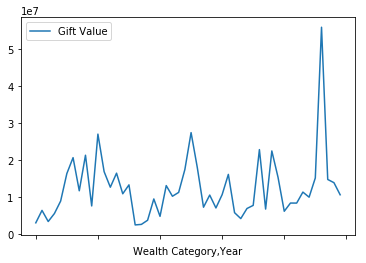

In [186]:
#Default line plot using the dataframe new that contains the subcategory wealth category
new_df.plot();

In [192]:
# Remove any  n/a records; these are not anoynymous donations but rather null records
dfinal = dfinal.dropna(how='any')
# dfinal.head(2)

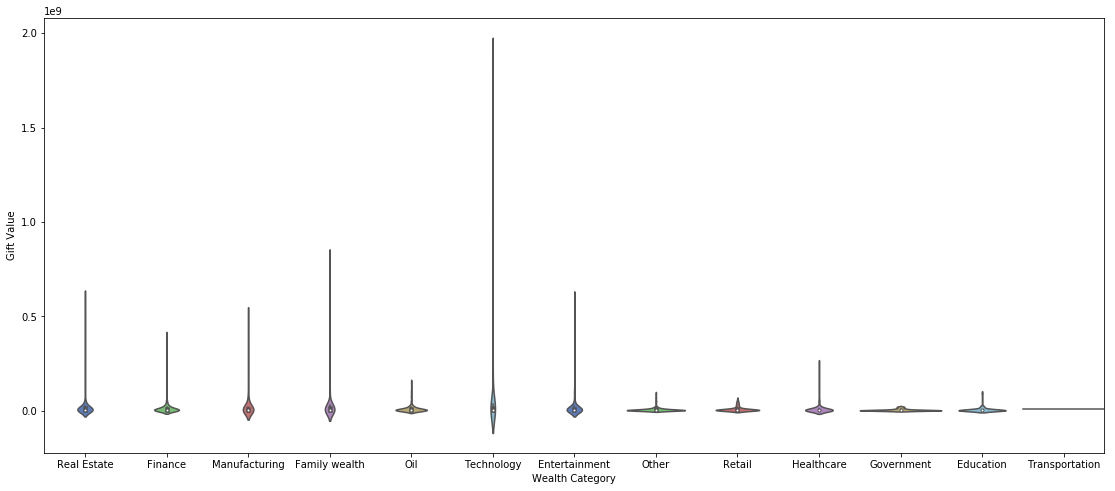

In [259]:
#Violin Plot to show correlation with wealth category and value of donations
fig,ax=plt.subplots(figsize=(19,8))

ax2= sns.violinplot(x='Wealth Category', y='Gift Value', data=dfinal, scale_hue=True, gridsize=80,
               saturation=0.75, color='purple', palette="muted", width=1, ax=ax )

plt.savefig("Violin Chart of Donations.png")


In [203]:
# # Combined data for 2015 - 2018 : Attempt at a scatter plot
# x_axis = dfinal["Gift Value"]/1000000000
# y_axis = dfinal["Wealth Category"]
# # colors = ["Red", "Blue", "Green", "Gold"]
# # legend = [2015, 2016, 2017,2018]
# plt.scatter(x_axis, y_axis, s=110, edgecolors='black', color='y', marker="o", alpha=0.90)

# #Chart labels
# plt.title("Charitable Donations by Wealth")
# plt.xlabel("Donation Amount ($Billions)")
# plt.ylabel("Source of Wealth")
# plt.grid(linestyle='dotted')
# # plt.legend((2015, 2016, 2017, 2018),scatterpoints=1,
# #            loc='upper left',bbox_to_anchor=(1.0, 1.035),ncol=1,\
# #            fontsize=8, markerscale=0.75,
# #            title='Year',edgecolor='none',framealpha=1.00)

# plt.savefig("All_Donations vs. Wealth.png")
# plt.show()

In [196]:
# Create a group based on the values in the 'wealth category' column
wealth_grp =new_df.groupby('Wealth Category')
wealth_grp 
# Count how many times each maker appears in our group
sum_donations = wealth_grp['Gift Value'].sum()/1000000000

sum_donations

Wealth Category
Education         0.018820
Entertainment     0.058072
Family wealth     0.073235
Finance           0.053755
Government        0.018755
Healthcare        0.039816
Manufacturing     0.070563
Oil               0.044824
Other             0.025069
Real Estate       0.067819
Retail            0.034705
Technology        0.096239
Transportation    0.024730
Name: Gift Value, dtype: float64

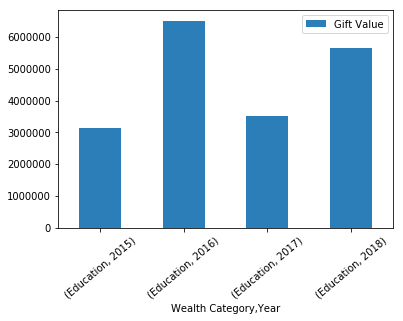

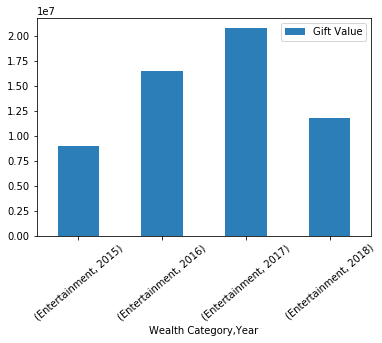

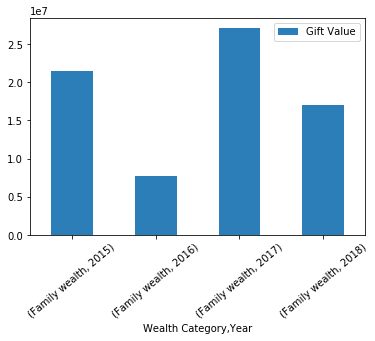

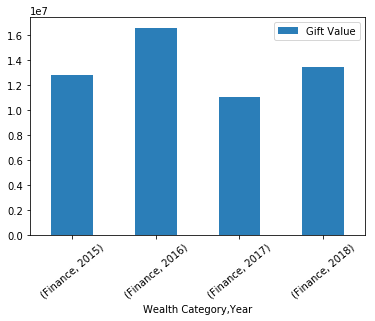

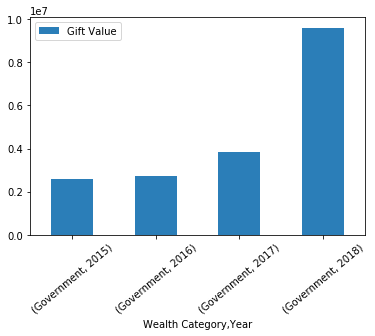

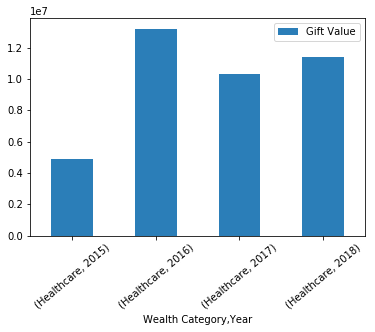

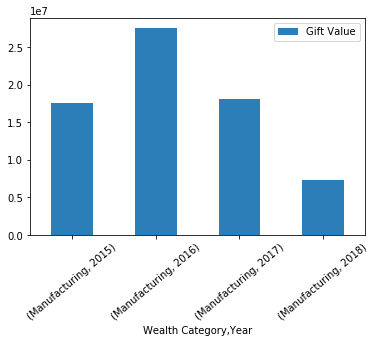

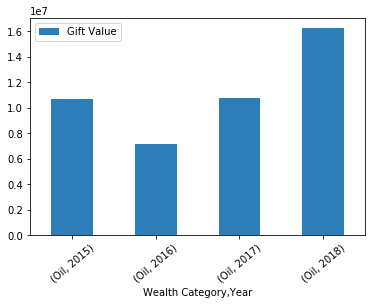

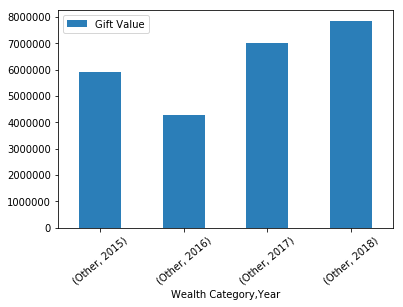

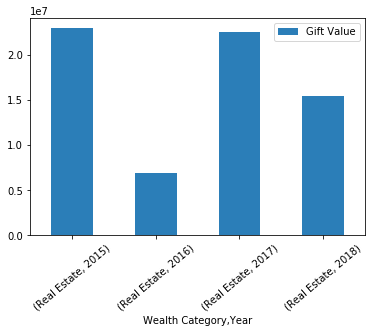

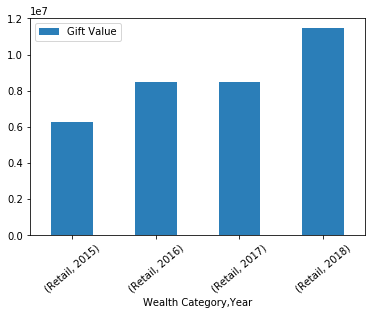

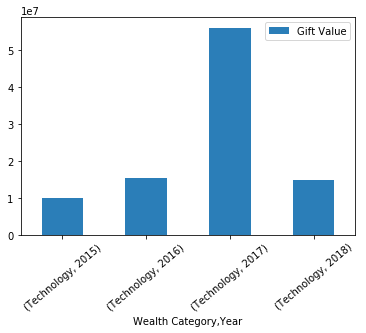

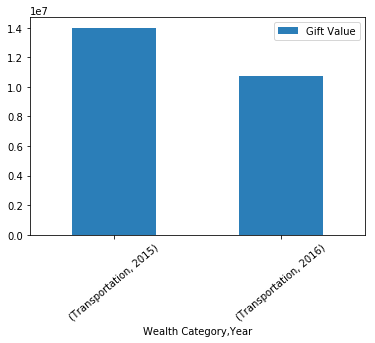

<Figure size 432x288 with 0 Axes>

In [197]:
# Create a bar chart based off of the group series from above
count_chart = wealth_grp.plot(kind='bar',align="center", alpha=0.95, rot=40)
# label=['Education','Entertainment','Family wealth','Finance','Government','Healthcare','Manufacturing','Oil','Other',
#        'Real Estate','Retail', 'Technology']
# label = [ '\n'.join(wrap(l, 20)) for l in labels ]

# Set the xlabel and ylabel using class methods
x_label=("Wealth Category", "")
y_label=("Donation in ($Billions)")
plt.title=("Donor's Source of Wealth & Donation Amount")

plt.savefig("Multi_Chart_SourceofWealth_by_Year.png")
plt.show()
plt.tight_layout()

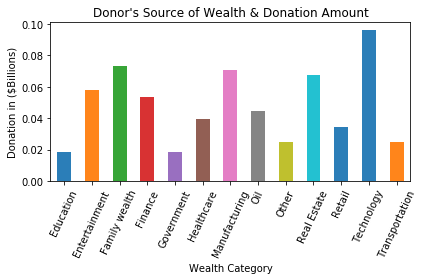

In [202]:
# Create a bar chart based off of the group series from above
count_chart = sum_donations.plot(kind='bar',align="center", alpha=0.95, rot=65)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Wealth Category")
count_chart.set_ylabel("Donation in ($Billions)")
count_chart.set_title("Donor's Source of Wealth & Donation Amount")

plt.tight_layout()
plt.savefig("Wealth by Source.png")
plt.show()


## Conclusion

The largest donations 